In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

## Data loading

In [2]:
# Use the upload method to upload the data file
uploaded = files.upload()

data_path = next(iter(uploaded))

# Load the Excel data file
shelter_data = pd.read_excel(data_path, sheet_name='data')

Saving INF2178_A1_data.xlsx to INF2178_A1_data (2).xlsx


## Data cleaning and preprocessing

basic information of the dataset

In [3]:
# Examine the Dataset
print("Dataset Shape:", shelter_data.shape)
print("\nData Types:\n", shelter_data.dtypes)

Dataset Shape: (50944, 14)

Data Types:
 OCCUPANCY_DATE            datetime64[ns]
ORGANIZATION_NAME                 object
PROGRAM_ID                         int64
PROGRAM_NAME                      object
SECTOR                            object
PROGRAM_MODEL                     object
OVERNIGHT_SERVICE_TYPE            object
PROGRAM_AREA                      object
SERVICE_USER_COUNT                 int64
CAPACITY_TYPE                     object
CAPACITY_ACTUAL_BED              float64
OCCUPIED_BEDS                    float64
CAPACITY_ACTUAL_ROOM             float64
OCCUPIED_ROOMS                   float64
dtype: object


In [4]:
# Missing value
print("\nMissing Values:\n", shelter_data.isnull().sum())


Missing Values:
 OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64


Data Cleaning

In [5]:
# Fill missing values for certain columns with 'Unknown'
columns_to_fill = ['PROGRAM_NAME', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']
for column in columns_to_fill:
    shelter_data[column] = shelter_data[column].fillna('Unknown')

# For bed and room capacity and occupancy, fill missing values with 0
columns_to_zero_fill = ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
for column in columns_to_zero_fill:
    shelter_data[column] = shelter_data[column].fillna(0)

In [6]:
# Descriptive summary of the dataset
print("\nSummary Statistics for Numerical Columns:\n", shelter_data.describe())


Summary Statistics for Numerical Columns:
          PROGRAM_ID  SERVICE_USER_COUNT  CAPACITY_ACTUAL_BED  OCCUPIED_BEDS  \
count  50944.000000        50944.000000         50944.000000   50944.000000   
mean   13986.125844           45.727171            20.114008      18.939443   
std     1705.288632           53.326049            26.449843      25.453389   
min    11791.000000            1.000000             0.000000       0.000000   
25%    12233.000000           15.000000             0.000000       0.000000   
50%    14251.000000           28.000000            14.000000      12.000000   
75%    15651.000000           51.000000            29.000000      28.000000   
max    16631.000000          339.000000           234.000000     234.000000   

       CAPACITY_ACTUAL_ROOM  OCCUPIED_ROOMS  
count          50944.000000    50944.000000  
mean              20.221439       19.220124  
std               44.731193       43.630866  
min                0.000000        0.000000  
25%           

In [7]:
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50944 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50944 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50944 non-null  object        
 7   PROGRAM_AREA            50944 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     50944 non-null  float64       
 11  OCCUPIED_BEDS           50944 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    50944 non-null  float6

In [8]:
# Calculate Occupancy Rate
shelter_data['Occupancy_Rate'] = shelter_data.apply(
    lambda x: (x['OCCUPIED_ROOMS'] / x['CAPACITY_ACTUAL_ROOM']) if x['CAPACITY_ACTUAL_ROOM'] > 0
    else (x['OCCUPIED_BEDS'] / x['CAPACITY_ACTUAL_BED']) if x['CAPACITY_ACTUAL_BED'] > 0
    else None,
    axis=1
)

## Examine interested columns

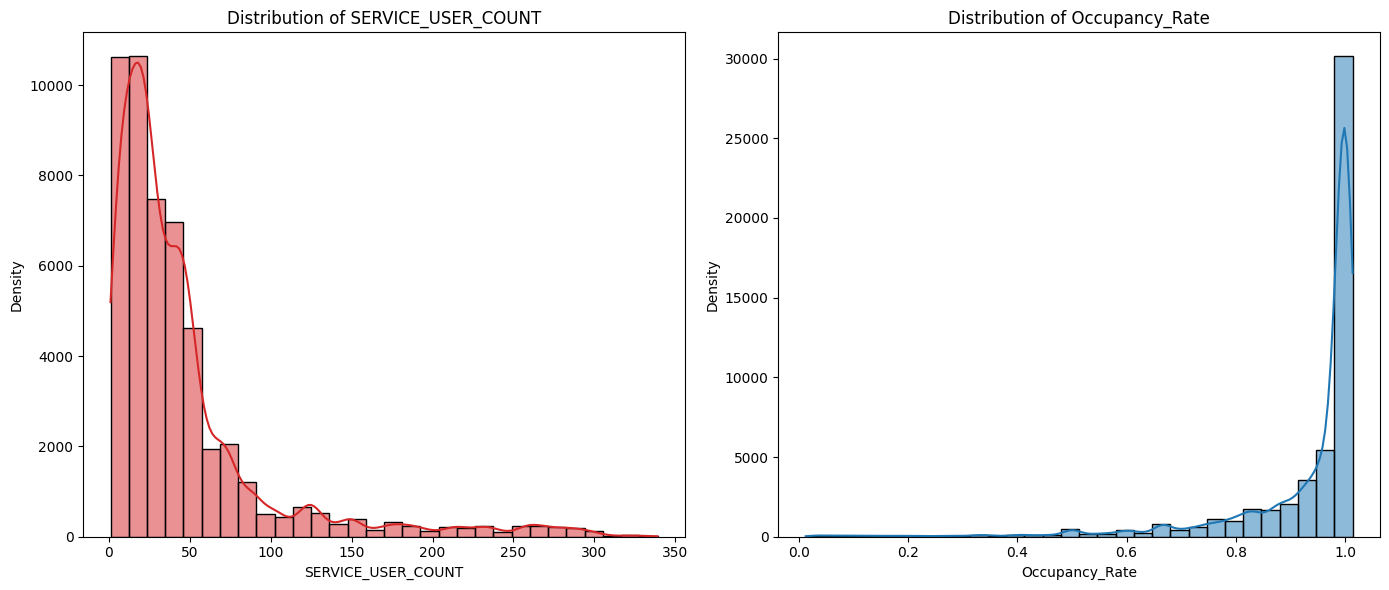

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure for two side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for SERVICE_USER_COUNT
sns.histplot(shelter_data['SERVICE_USER_COUNT'], ax=axes[0], bins=30, kde=True, color='tab:red')
axes[0].set_title('Distribution of SERVICE_USER_COUNT')
axes[0].set_xlabel('SERVICE_USER_COUNT')
axes[0].set_ylabel('Density')

# Plot for Occupancy_Rate
sns.histplot(shelter_data['Occupancy_Rate'], ax=axes[1], bins=30, kde=True, color='tab:blue')
axes[1].set_title('Distribution of Occupancy_Rate')
axes[1].set_xlabel('Occupancy_Rate')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

Service user count's skewness is towards left while occupancy rate's skewness is towards right.\
Most shelter has almost full occupancy rate, while the majority of them is relative small.

## Exploratory Data Analysis (EDA)

The goal of the EDA, which is to uncover patterns, trends, and disparities within the shelter system that can inform policy, resource allocation, and program development in terms of sectors.

 key features: SERVICE_USER_COUNT, OCCUPANCY_RATE, SECTOR

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

<ipython-input-11-60b925fa2dc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="coolwarm")


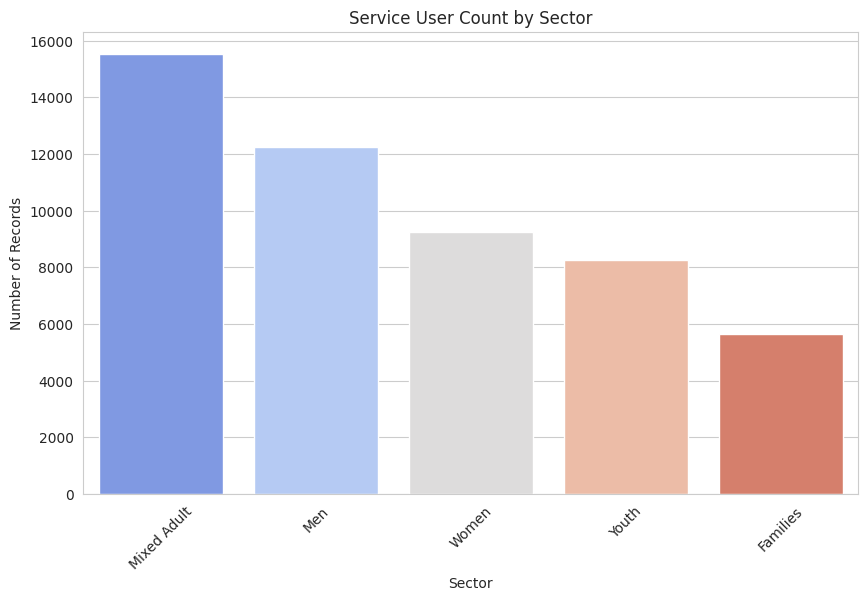

In [11]:
# Plot for service user count by sector
plt.figure(figsize=(10, 6))
sector_counts = shelter_data['SECTOR'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="coolwarm")
plt.title('Service User Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

The user count is not even across sectors, indicating variability.

<ipython-input-12-7db16951db4c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', data=families_youth_data, estimator=sum, ci=None, ax=axes[0])
<ipython-input-12-7db16951db4c>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', data=men_women_data, estimator=sum, ci=None, ax=axes[1])


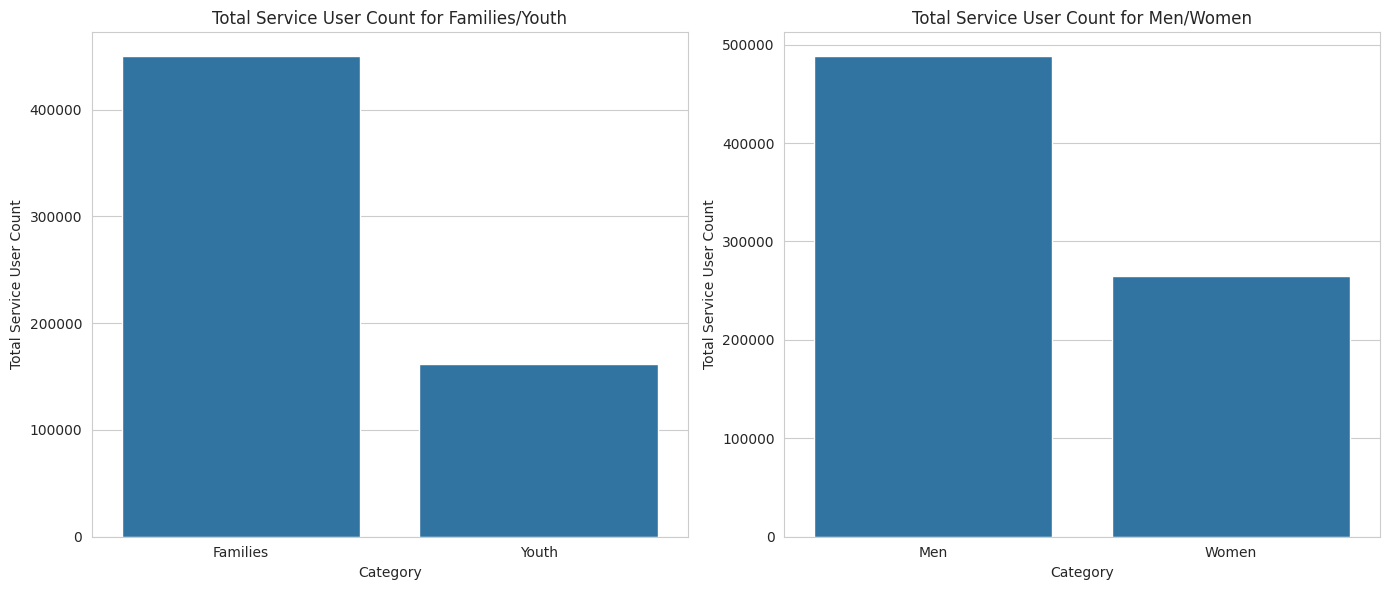

In [12]:
# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for Families/Youth and Men/Women categories
families_youth_data = shelter_data[shelter_data['SECTOR'].isin(['Families', 'Youth'])]
men_women_data = shelter_data[shelter_data['SECTOR'].isin(['Men', 'Women'])]

# Families/Youth and SERVICE_USER_COUNT
sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', data=families_youth_data, estimator=sum, ci=None, ax=axes[0])
axes[0].set_title('Total Service User Count for Families/Youth')
axes[0].set_ylabel('Total Service User Count')
axes[0].set_xlabel('Category')

# Men/Women and SERVICE_USER_COUNT
sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', data=men_women_data, estimator=sum, ci=None, ax=axes[1])
axes[1].set_title('Total Service User Count for Men/Women')
axes[1].set_ylabel('Total Service User Count')
axes[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

<ipython-input-13-7ed50e618c86>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=families_youth_data,
<ipython-input-13-7ed50e618c86>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=men_women_data,


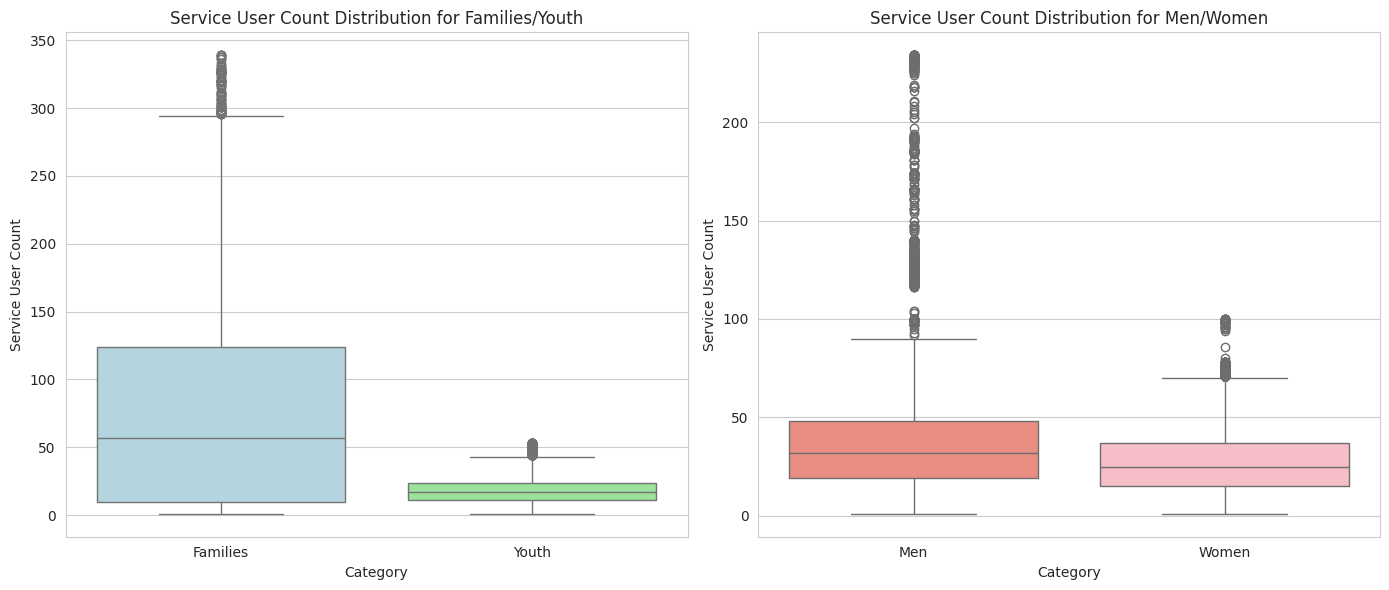

In [13]:
# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for Families/Youth and Men/Women categories
families_youth_data = shelter_data[shelter_data['SECTOR'].isin(['Families', 'Youth'])]
men_women_data = shelter_data[shelter_data['SECTOR'].isin(['Men', 'Women'])]

# Define color palette for categories
category_colors_families_youth = {"Families": "lightblue", "Youth": "lightgreen"}
category_colors_men_women = {"Men": "salmon", "Women": "lightpink"}

# Families/Youth and SERVICE_USER_COUNT Boxplot with Custom Colors
sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=families_youth_data,
            palette=category_colors_families_youth, ax=axes[0])
axes[0].set_title('Service User Count Distribution for Families/Youth')
axes[0].set_ylabel('Service User Count')
axes[0].set_xlabel('Category')

# Men/Women and SERVICE_USER_COUNT Boxplot with Custom Colors
sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=men_women_data,
            palette=category_colors_men_women, ax=axes[1])
axes[1].set_title('Service User Count Distribution for Men/Women')
axes[1].set_ylabel('Service User Count')
axes[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

The central tendencies is much lower in the familes/youth group than it in the men/women group.\
The families/youth group share a larger gap in the variability, compared to the men/women gap.

 occupancy rate

<ipython-input-14-8b3e358d89a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SECTOR', y='Occupancy_Rate', data=avg_occupancy_by_sector, palette="viridis")


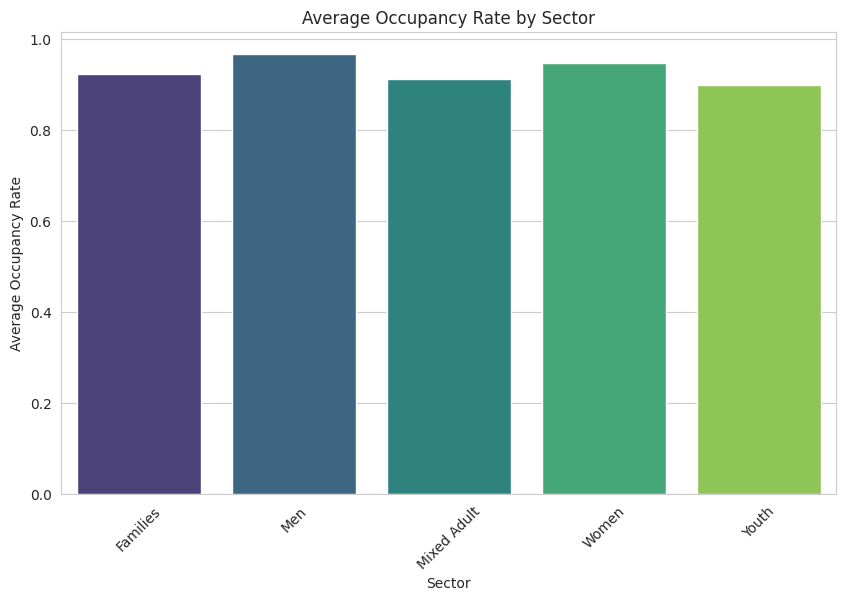

In [14]:
# Plot for average occupancy rate by sector
plt.figure(figsize=(10, 6))
avg_occupancy_by_sector = shelter_data.groupby('SECTOR')['Occupancy_Rate'].mean().reset_index()
sns.barplot(x='SECTOR', y='Occupancy_Rate', data=avg_occupancy_by_sector, palette="viridis")
plt.title('Average Occupancy Rate by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-a840ab2fb312>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SECTOR', y='Occupancy_Rate', data=families_youth_data, ci=None, ax=axes[0])
<ipython-input-15-a840ab2fb312>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SECTOR', y='Occupancy_Rate', data=men_women_data, ci=None, ax=axes[1])


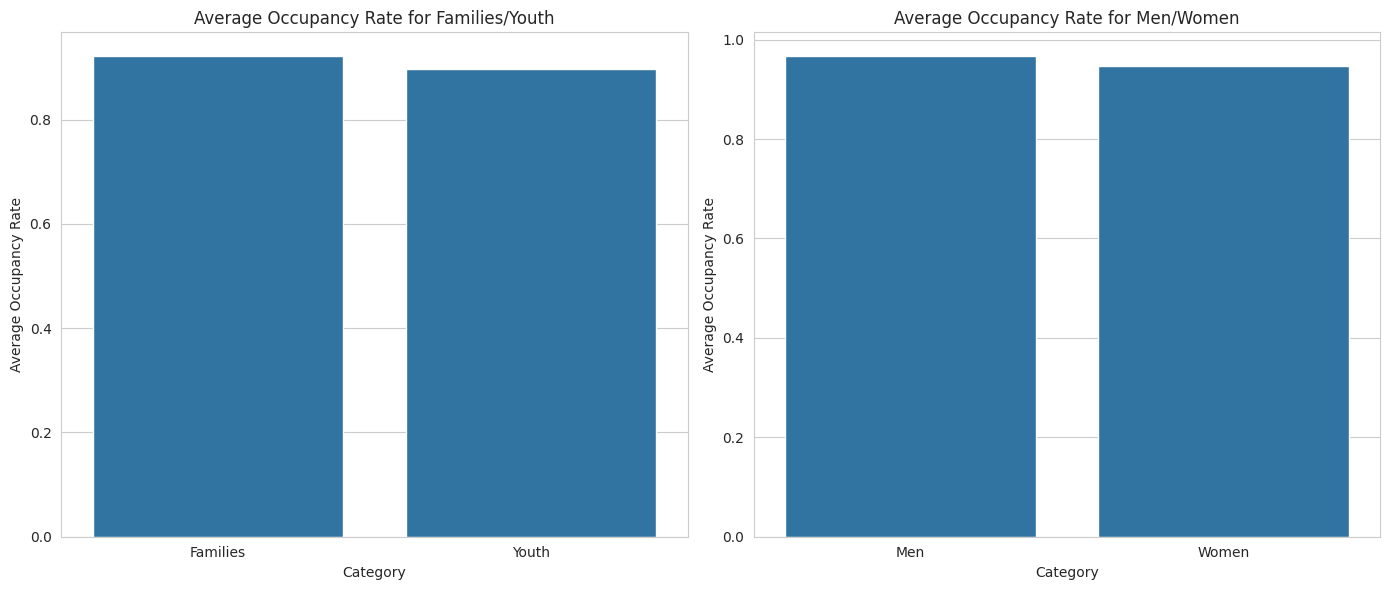

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for Families/Youth and Men/Women categories
families_youth_data = shelter_data[shelter_data['SECTOR'].isin(['Families', 'Youth'])]
men_women_data = shelter_data[shelter_data['SECTOR'].isin(['Men', 'Women'])]

# Families/Youth and Occupancy Rate
sns.barplot(x='SECTOR', y='Occupancy_Rate', data=families_youth_data, ci=None, ax=axes[0])
axes[0].set_title('Average Occupancy Rate for Families/Youth')
axes[0].set_ylabel('Average Occupancy Rate')
axes[0].set_xlabel('Category')

# Men/Women and Occupancy Rate
sns.barplot(x='SECTOR', y='Occupancy_Rate', data=men_women_data, ci=None, ax=axes[1])
axes[1].set_title('Average Occupancy Rate for Men/Women')
axes[1].set_ylabel('Average Occupancy Rate')
axes[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

<ipython-input-16-f1d6f7532b26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECTOR', y='Occupancy_Rate', data=families_youth_data,
<ipython-input-16-f1d6f7532b26>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECTOR', y='Occupancy_Rate', data=men_women_data,


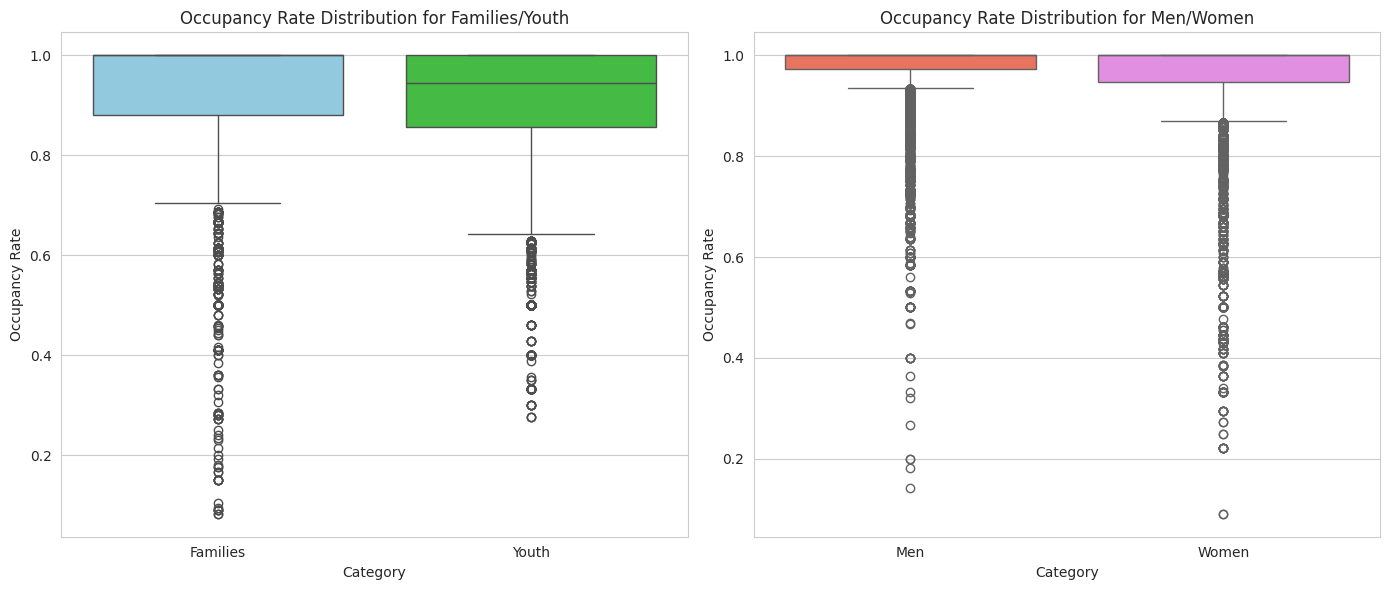

In [16]:
# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for Families/Youth and Men/Women categories
families_youth_data = shelter_data[shelter_data['SECTOR'].isin(['Families', 'Youth'])]
men_women_data = shelter_data[shelter_data['SECTOR'].isin(['Men', 'Women'])]

# Define custom color palettes
color_palette_families_youth = {"Families": "skyblue", "Youth": "limegreen"}
color_palette_men_women = {"Men": "tomato", "Women": "violet"}

# Families/Youth and Occupancy Rate Boxplot with Custom Colors
sns.boxplot(x='SECTOR', y='Occupancy_Rate', data=families_youth_data,
            palette=color_palette_families_youth, ax=axes[0])
axes[0].set_title('Occupancy Rate Distribution for Families/Youth')
axes[0].set_ylabel('Occupancy Rate')
axes[0].set_xlabel('Category')

# Men/Women and Occupancy Rate Boxplot with Custom Colors
sns.boxplot(x='SECTOR', y='Occupancy_Rate', data=men_women_data,
            palette=color_palette_men_women, ax=axes[1])
axes[1].set_title('Occupancy Rate Distribution for Men/Women')
axes[1].set_ylabel('Occupancy Rate')
axes[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

The central tendencies is very low in both groups.\
The families/youth group share a larger gap in the variability, compared to the men/women gap.

## Quantitative Analysis Using T-Tests

men/women and occupancy rate

In [17]:
# Filter data for 'Men' and 'Women' sectors
men_shelters = shelter_data[shelter_data['SECTOR'] == 'Men']['Occupancy_Rate'].dropna()
women_shelters = shelter_data[shelter_data['SECTOR'] == 'Women']['Occupancy_Rate'].dropna()

# Conducting the t-test
t_stat, p_value = ttest_ind(men_shelters, women_shelters, equal_var=False)

print(f"Men shelters sample size: {len(men_shelters)}, Mean occupancy rate: {men_shelters.mean()}")
print(f"Women shelters sample size: {len(women_shelters)}, Mean occupancy rate: {women_shelters.mean()}")
print(f"T-Statistic: {t_stat}, P-value: {p_value}")

Men shelters sample size: 12241, Mean occupancy rate: 0.9664349452680328
Women shelters sample size: 9258, Mean occupancy rate: 0.9469702005948404
T-Statistic: 14.51818227629494, P-value: 1.8982875825463364e-47


The t-test yielded a T-Statistic of 14.518 and a P-value of approximately 1.90e-47, which is significantly lower than the conventional alpha level of 0.05.\
This result indicates a statistically significant difference in the occupancy rates between men's and women's shelters.

Families/Youth and occupancy rate

In [18]:
# Filter data for 'Families' and 'Youth' sectors
families_shelters = shelter_data[shelter_data['SECTOR'] == 'Families']['Occupancy_Rate'].dropna()
youth_shelters = shelter_data[shelter_data['SECTOR'] == 'Youth']['Occupancy_Rate'].dropna()

# Conducting the t-test
t_stat, p_value = ttest_ind(families_shelters, youth_shelters, equal_var=False)

print(f"Families shelters sample size: {len(families_shelters)}, Mean occupancy rate: {families_shelters.mean()}")
print(f"Youth shelters sample size: {len(youth_shelters)}, Mean occupancy rate: {youth_shelters.mean()}")
print(f"T-Statistic: {t_stat}, P-value: {p_value}")

Families shelters sample size: 5649, Mean occupancy rate: 0.9214638507241963
Youth shelters sample size: 8263, Mean occupancy rate: 0.8977610407717398
T-Statistic: 10.015688710986534, P-value: 1.6043857592501753e-23


The t-test between family and youth shelters yielded a T-Statistic of 10.016 and a P-value of about 1.60e-23.\
Such a low p-value decisively indicates a statistically significant difference in the occupancy rates of family versus youth shelters.

men/women andService_user_count.\
Families/Youth and Service_user_count

In [19]:
# Extract service user counts for specified sectors
families_service_count = shelter_data[shelter_data['SECTOR'] == 'Families']['SERVICE_USER_COUNT']
youth_service_count = shelter_data[shelter_data['SECTOR'] == 'Youth']['SERVICE_USER_COUNT']
men_service_count = shelter_data[shelter_data['SECTOR'] == 'Men']['SERVICE_USER_COUNT']
women_service_count = shelter_data[shelter_data['SECTOR'] == 'Women']['SERVICE_USER_COUNT']

# Perform t-tests between sectors
t_stat_families_youth, p_value_families_youth = ttest_ind(families_service_count, youth_service_count, equal_var=False, nan_policy='omit')
t_stat_men_women, p_value_men_women = ttest_ind(men_service_count, women_service_count, equal_var=False, nan_policy='omit')

# Print the results for Men vs. Women
print(f"Men service count sample size: {len(men_service_count)}, Mean service user count: {men_service_count.mean()}")
print(f"Women service count sample size: {len(women_service_count)}, Mean service user count: {women_service_count.mean()}")
print(f"Men vs. Women: T-statistic = {t_stat_men_women}, P-value = {p_value_men_women}\n")

# Print the results for Families vs. Youth
print(f"Families service count size: {len(families_service_count)}, Mean service user count: {families_service_count.mean()}")
print(f"Youth service count size: {len(youth_service_count)}, Mean service user count: {youth_service_count.mean()}")
print(f"Families vs. Youth: T-statistic = {t_stat_families_youth}, P-value = {p_value_families_youth}")


Men service count sample size: 12241, Mean service user count: 39.86953680254881
Women service count sample size: 9258, Mean service user count: 28.656189241736875
Men vs. Women: T-statistic = 30.50421164151915, P-value = 1.0532742925183108e-199

Families service count size: 5649, Mean service user count: 79.65197380067269
Youth service count size: 8263, Mean service user count: 19.536245915527047
Families vs. Youth: T-statistic = 58.35197213752553, P-value = 0.0


Statistical Significance: The t-test revealed a T-Statistic of 30.504 with a P-value practically at zero (1.05e-199), indicating a highly significant difference in service user counts between men's and women's shelters.

Statistical Significance: The analysis yielded a T-Statistic of 58.352 with a P-value of 0, signifying an extremely significant difference in service user counts between family and youth shelters.

The differences in service user counts across these demographics underscore varying levels of demand and  challenges faced by these groups.\

 The significant higher service demand in men's and family shelters calls for targeted resource allocation and policy interventions to address their specific needs.\

Further Research: The findings invite further investigation into the factors driving higher service user counts in men's and family shelters. Understanding these dynamics is essential for developing targeted solutions.\